
# Assignment Set 6

by **Amir Mehrpanah** for Deep Learing Course at Data Science Center, SBU


In [ ]:
path = '/data/traffic_signs_classification'
y = pd.read_csv('/data/traffic_signs_classification/labels.csv')

## Importing Libraries

In [ ]:
#@title reading whole data
class_labels = {k:v for k,v in enumerate(y['Name'])}

datagen = ImageDataGenerator()
data = datagen.flow_from_directory(path + '/myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )
x, y = data.next()

Found 73139 images belonging to 43 classes.


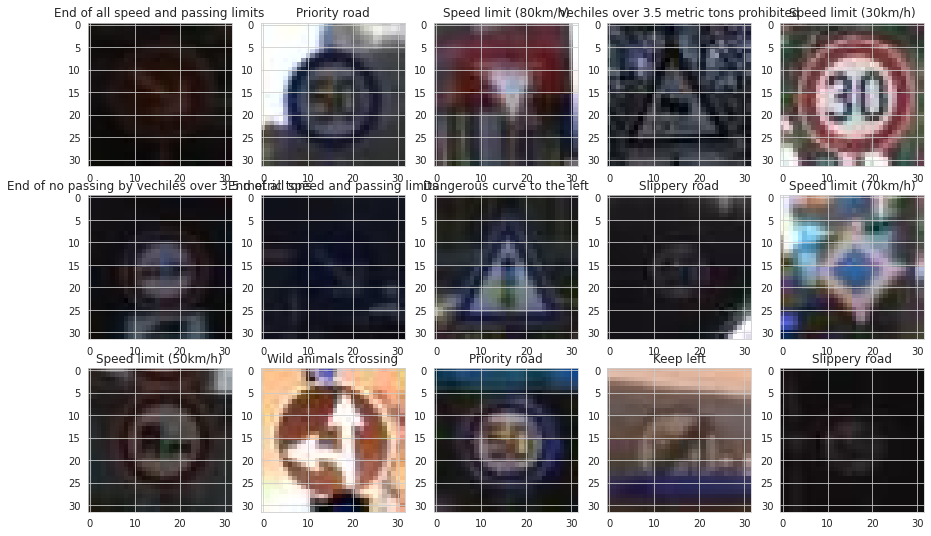

In [ ]:
#@title sample images from the data set
fig, axes = plt.subplots(3,5, figsize=(15,9))
for i,ax in enumerate(axes.flat):
    ax.imshow(x[i].astype('uint8'))
    ax.set_title(str(class_labels[np.argmax(y[i])]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.15)
print("train\t{}\nvalidation\t{}\ntest\t{}".format(x_train.shape,x_val.shape, x_test.shape))

train	(47540, 32, 32, 3)
validation	(3840, 32, 32, 3)
test	(21759, 32, 32, 3)


In [ ]:
#@title Multi Hidden Layer CNNs
epochs =  10#@param {type:"integer"}
verbose =  2#@param {type:"number"}

mdl_pool = {}

name = 'conv_clf'
mdl_pool[name] ={}

input = keras.Input(shape=(32,32,3))
x_ = layers.Conv2D(64,3,activation="relu")(input)
x_ = layers.MaxPool2D()(x_)
x_ = layers.Conv2D(64,3,activation='relu')(x_)
x_ = layers.Conv2D(64,3,activation="relu")(x_)
x_ = layers.MaxPool2D()(x_)
x_ = layers.Conv2D(64,3,activation="relu")(x_)
x_ = layers.Flatten()(x_)
x_ = layers.Dense(128,activation="relu")(x_)
x_ = layers.BatchNormalization()(x_)
output = layers.Dense(43,'softmax')(x_)
nonregularized_model = keras.Model(inputs=input, outputs=output, name=name)
nonregularized_model.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer='Adam',
            metrics=['accuracy'])
mdl_pool[name]['history'] = nonregularized_model.fit(x = x_train, y = y_train,
                    batch_size=64, epochs=epochs,
                    verbose=verbose,validation_data=(x_val,y_val)).history

name = 'conv_clf_regularized'
mdl_pool[name] ={}

input = keras.Input(shape=(32,32,3))
x_ = layers.Conv2D(64,3,activation="relu")(input)
x_ = layers.BatchNormalization()(x_)
x_ = layers.MaxPool2D()(x_)
x_ = layers.Dropout(0.25)(x_)
x_ = layers.Conv2D(64,3,activation='relu')(x_)
x_ = layers.BatchNormalization()(x_)
x_ = layers.Conv2D(64,3,activation="relu")(x_)
x_ = layers.MaxPool2D()(x_)
x_ = layers.Conv2D(64,3,activation="relu")(x_)
x_ = layers.Flatten()(x_)
x_ = layers.Dropout(0.35)(x_)
x_ = layers.Dense(128,activation="relu")(x_)
x_ = layers.BatchNormalization()(x_)
x_ = layers.Dropout(0.5)(x_)
output = layers.Dense(43,'softmax')(x_)
regularized_model = keras.Model(inputs=input, outputs=output, name=name)
regularized_model.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer='Adam',
            metrics=['accuracy'])
mdl_pool[name]['history'] = regularized_model.fit(x = x_train, y = y_train,
                    batch_size=64, epochs=epochs,
                    verbose=verbose,validation_data=(x_val,y_val)).history

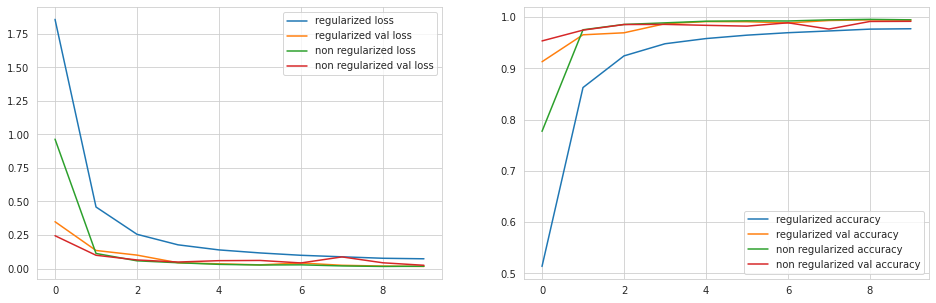

In [ ]:
#@title Plotting Training History
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(mdl_pool['conv_clf_regularized']['history']['loss'],label = 'regularized loss')
plt.plot(mdl_pool['conv_clf_regularized']['history']['val_loss'],label = 'regularized val loss')
plt.plot(mdl_pool['conv_clf']['history']['loss'],label = 'non regularized loss')
plt.plot(mdl_pool['conv_clf']['history']['val_loss'],label = 'non regularized val loss')
plt.legend()

plt.subplot(122)
plt.plot(mdl_pool['conv_clf_regularized']['history']['accuracy'],label = 'regularized accuracy')
plt.plot(mdl_pool['conv_clf_regularized']['history']['val_accuracy'],label = 'regularized val accuracy')
plt.plot(mdl_pool['conv_clf']['history']['accuracy'],label = 'non regularized accuracy')
plt.plot(mdl_pool['conv_clf']['history']['val_accuracy'],label = 'non regularized val accuracy')
plt.legend()

In [ ]:
#@title Evaluation of The L2 Regularized Model and Non Regularized Model
print(nonregularized_model.evaluate(x_test, y_test))
print(regularized_model.evaluate(x_test, y_test))

21759/21759 [==============================] - 2s 105us/sample - loss: 0.0351 - accuracy: 0.9921
[0.03511579321890005, 0.9921412]
21759/21759 [==============================] - 3s 115us/sample - loss: 0.0192 - accuracy: 0.9945
[0.019184957158557593, 0.994485]
